In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
final_data = pd.read_csv('/Jupyter/Temp/IMDb EDA/Final Data.csv')

In [3]:
# Spliting the data into train and test part

x= final_data.drop('Worlwide Gross Income', axis = 1)
y = final_data['Worlwide Gross Income']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1)
x_train.shape, y_train.shape, x_test.shape, y_test.shape, final_data.shape

((63777, 111), (63777,), (21259, 111), (21259,), (85036, 112))

In [4]:
lr_model = LinearRegression()

lr_model.fit(x_train, y_train)

LinearRegression()

In [5]:
y_pred = lr_model.predict(x_test)

In [6]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.19323573070712521
R-squared: 0.8058330496746086


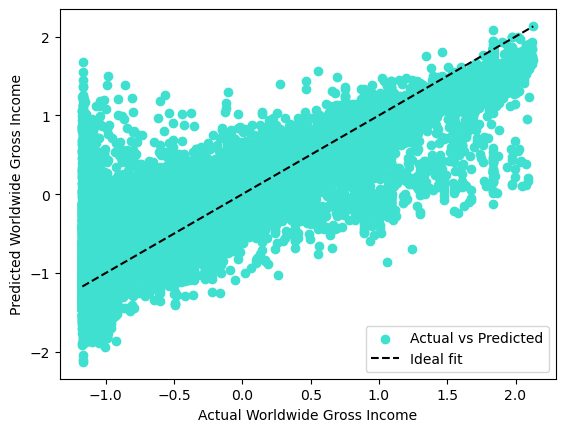

In [7]:
plt.scatter(y_test, y_pred, color='turquoise', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--', label='Ideal fit')
plt.xlabel('Actual Worldwide Gross Income')
plt.ylabel('Predicted Worldwide Gross Income')
plt.legend()
plt.show()

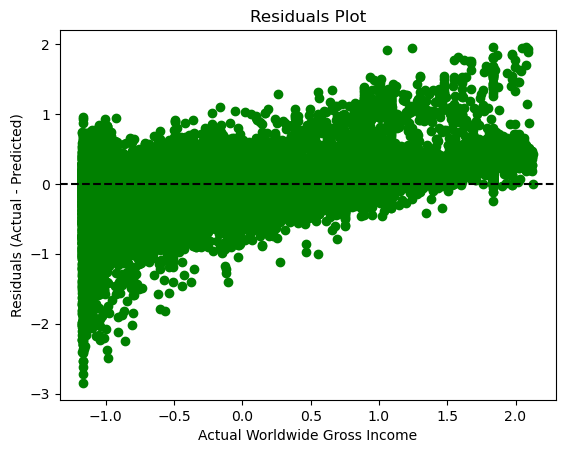

In [8]:
# Residuals plot (Actual - Predicted)
residuals = y_test - y_pred

plt.scatter(y_test, residuals, color='green')
plt.axhline(0, color='black', linestyle='--')  # This is the "ideal" line (0 residuals)
plt.xlabel('Actual Worldwide Gross Income')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals Plot')
plt.show()

In [9]:
import numpy as np

# Helper to generate encoded rows based on the user description
def generate_movie_entry(year, genres, release_date, writer_tier, director_tier,actor1_tier, actor2_tier, language, country, rating,votes, budget, usa_gross):
    # Parse release_date
    release_day = pd.to_datetime(release_date, dayfirst=True)
    release_month = release_day.month
    release_quarter = (release_day.month - 1) // 3 + 1
    release_dayofweek = release_day.weekday()

    # Initialize a row with zeros
    row = pd.Series(0, index=final_data.columns.drop('Worlwide Gross Income'))

    # Continuous fields (before scaling, assuming standard scaling was used)
    row['Year'] = year
    row['Imdb Rating'] = rating
    row['Votes'] = votes
    row['Budget'] = budget
    row['Usa Gross Income'] = usa_gross
    row['Release Month'] = release_month
    row['Release Quater'] = release_quarter
    row['Release DayofWeek'] = release_dayofweek

    # Set genre flags
    for genre in genres:
        genre_col = f'Genre_{genre}'
        if genre_col in row:
            row[genre_col] = 1

    # Set language and country
    if f'Language_{language}' in row:
        row[f'Language_{language}'] = 1
    if f'Country_{country}' in row:
        row[f'Country_{country}'] = 1

    # Set tiers
    if f'Writer_Tier {writer_tier}' in row:
        row[f'Writer_Tier {writer_tier}'] = 1
    if f'Director_Tier {director_tier}' in row:
        row[f'Director_Tier {director_tier}'] = 1
    if f'Actor_1_Tier {actor1_tier}' in row:
        row[f'Actor_1_Tier {actor1_tier}'] = 1
    if f'Actor_2_Tier {actor2_tier}' in row:
        row[f'Actor_2_Tier {actor2_tier}'] = 1

    return row

# Create two entries based on the provided details
movie1 = generate_movie_entry(
    year=2005,
    genres=['Action', 'Thriller'],
    release_date='22-12-2005',
    writer_tier=1,
    director_tier=2,
    actor1_tier=1,
    actor2_tier=3,
    language='English',
    country='USA',
    rating=6.3,
    votes=57,
    budget=5500000,
    usa_gross=3900000
)

movie2 = generate_movie_entry(
    year=2005,
    genres=['Romance', 'Comedy'],
    release_date='22-12-2005',
    writer_tier=3,
    director_tier=2,
    actor1_tier=2,
    actor2_tier=3,
    language='English',
    country='USA',
    rating=6.0,
    votes=87,
    budget=3500000,
    usa_gross=3600000
)

# Combine and scale with same method as final_df (we'll infer the scaler from statistics of final_df)
new_movies = pd.DataFrame([movie1, movie2])
new_movies.head()


C:\Users\nothi\AppData\Local\Temp\ipykernel_12280\3908134221.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.3' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  row['Imdb Rating'] = rating


,Year,Duration,Imdb Rating,Votes,Budget,Usa Gross Income,Release Month,Release Quater,Release DayofWeek,Prime Time For Release,...,Actor_2_Tier 1,Actor_2_Tier 2,Actor_2_Tier 3,Actor_2_Tier 4,Actor_2_Tier 5,Writer_Tier 1,Writer_Tier 2,Writer_Tier 3,Writer_Tier 4,Writer_Tier 5
0,2005.0,0.0,6.3,57.0,5500000.0,3900000.0,12.0,4.0,3.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2005.0,0.0,6.0,87.0,3500000.0,3600000.0,12.0,4.0,3.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [10]:
# Get the numerical columns used in scaling (we exclude categorical encoded columns)
numerical_cols = ['Year', 'Imdb Rating', 'Votes', 'Budget', 'Usa Gross Income', 'Release Month', 'Release Quater', 'Release DayofWeek']

# Compute mean and std from final_df
means = final_data[numerical_cols].mean()
stds = final_data[numerical_cols].std()

# Apply standard scaling to the new rows
new_movies_scaled = new_movies.copy()
new_movies_scaled[numerical_cols] = (new_movies[numerical_cols] - means) / stds

# Add a placeholder for the target (Worlwide Gross Income) since it's what the model will predict
new_movies_scaled['Worlwide Gross Income'] = np.nan

new_movies_scaled.head(2)


,Year,Duration,Imdb Rating,Votes,Budget,Usa Gross Income,Release Month,Release Quater,Release DayofWeek,Prime Time For Release,...,Actor_2_Tier 2,Actor_2_Tier 3,Actor_2_Tier 4,Actor_2_Tier 5,Writer_Tier 1,Writer_Tier 2,Writer_Tier 3,Writer_Tier 4,Writer_Tier 5,Worlwide Gross Income
0,2004.988211,0.0,6.299963,56.999665,5.499968e+06,3.899977e+06,11.999929,3.999976,2.999982,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
1,2004.988211,0.0,5.999965,86.999488,3.499979e+06,3.599979e+06,11.999929,3.999976,2.999982,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN


In [11]:
new_data = new_movies_scaled.drop(columns=['Worlwide Gross Income'], errors='ignore')

new_movies_scaled.columns, new_data.columns

(Index(['Year', 'Duration', 'Imdb Rating', 'Votes', 'Budget',
        'Usa Gross Income', 'Release Month', 'Release Quater',
        'Release DayofWeek', 'Prime Time For Release',
        ...
        'Actor_2_Tier 2', 'Actor_2_Tier 3', 'Actor_2_Tier 4', 'Actor_2_Tier 5',
        'Writer_Tier 1', 'Writer_Tier 2', 'Writer_Tier 3', 'Writer_Tier 4',
        'Writer_Tier 5', 'Worlwide Gross Income'],
       dtype='object', length=112),
 Index(['Year', 'Duration', 'Imdb Rating', 'Votes', 'Budget',
        'Usa Gross Income', 'Release Month', 'Release Quater',
        'Release DayofWeek', 'Prime Time For Release',
        ...
        'Actor_2_Tier 1', 'Actor_2_Tier 2', 'Actor_2_Tier 3', 'Actor_2_Tier 4',
        'Actor_2_Tier 5', 'Writer_Tier 1', 'Writer_Tier 2', 'Writer_Tier 3',
        'Writer_Tier 4', 'Writer_Tier 5'],
       dtype='object', length=111))

In [12]:
predictions = lr_model.predict(new_data)

# 4. View the predictions
print(predictions)

[2111589.06908223 1903817.21616742]
